# Movie Budgets
### <span style="color:#83898b">*Understanding how budget affects the quality of a movie?*</span>


Movies have always been a source of entertainment that people all over the globe enjoy. People enjoy movies so much that we have cinemas where we can watch movies in
the best environment possible. Movies can give you mixes of various emotions such asfear,laughter,sadness,etc. which make every movie unique. However, I've always wondered
a movie like Pirates of the Caribbean: On Stranger Tides known to be the most expensive film that costed $422 million provided me the same level of enjoyment I received when 
watching The Blair Witch Project which costed $60,000. This got me thinking does spending more money to make a movie make it better? Today, I explore the relationship between
movie budget and quality of the movie

# Data Collection

Data from movies at IMDB from 1986 to 2016 has been scraped and shared at Kaggle, a free source of datasets

In [197]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [198]:
#Load Data
movies = pd.read_csv('movies.csv')

# Data Cleaning

The dataset of movies has some movies that don't have enough votes to have a clear rating. So I removed movies from the data that have less than 5,000 votes since I believe if you 5000 votes that is a big enough sample to give a good consensus rating.

In [199]:

#Removing Movies with Votes less than 5000
movies= movies.drop(movies[movies.votes<5000].index)

The dataset had some rows where there were missing values so I removed them from the dataset.

In [200]:
#Remove Missing Data
movies.dropna(axis=0)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,The Invisible Man,R,Drama,2020,"February 28, 2020 (United States)",7.1,186000.0,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000.0,143151000.0,Universal Pictures,124.0
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0


# Analysis

# Distribution
First off I want to explore the distribution in this dataset of movies. As we can see majority of the data has a small budget (Less than 50 million)

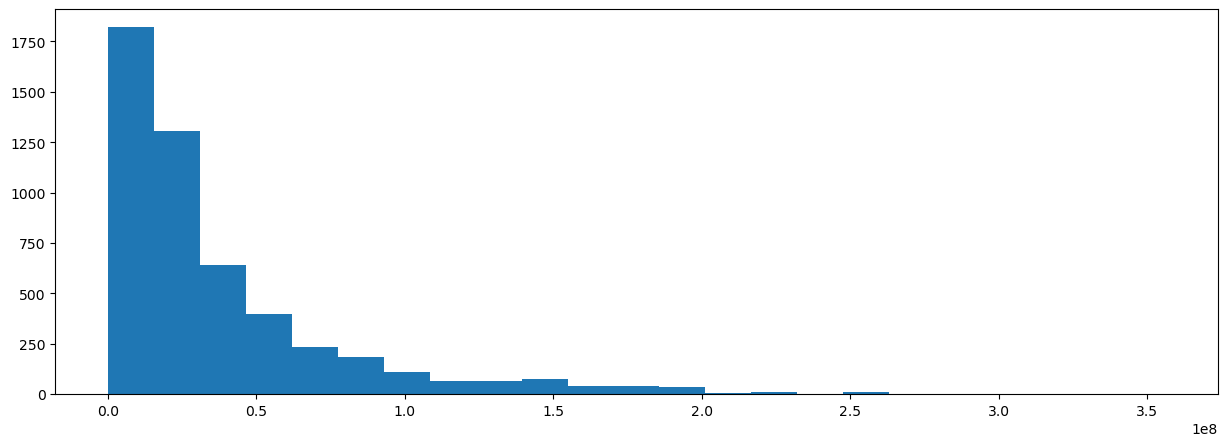

In [201]:
h = movies.budget.hist(bins=23, figsize=(15,5), grid=False)

From this distribution we can see that majority of the scores fall within 6 to 7     

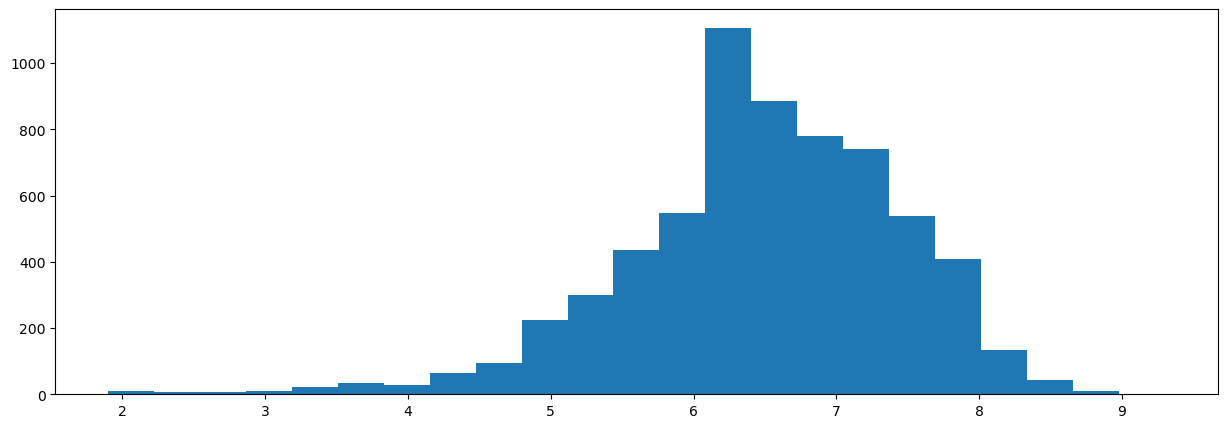

In [202]:
h = movies.score.hist(bins=23, figsize=(15,5), grid=False)

# Budget and Gross Earning

A comparison between budget and gross earnings showed that a movie with a bigger budget received a higher gross earning compared to lower budget movies.

In [203]:
print(f"High Budget Gross: {round(movies.loc[movies.budget >= 50000000].gross.mean(),2)}")
print(f"Low Budget Gross: {round(movies.loc[movies.budget < 50000000].gross.mean(),2)}")

High Budget Gross: 285265819.19
Low Budget Gross: 53113977.02


# Budget and Rating

However, the comaprison between the budget and IMDB score showed that budget didnt make much of a difference to the rating of the movie. It still stayed relatively similar.

In [204]:
print(f"High Budget Rating: {round(movies.loc[movies.budget >= 50000000].score.mean(),2)}")
print(f"Low Budget Rating: {round(movies.loc[movies.budget < 50000000].score.mean(),2)}")

High Budget Rating: 6.46
Low Budget Rating: 6.44


Analysis
 From this graph we can see that as the budget increases the gross is likely to increase too

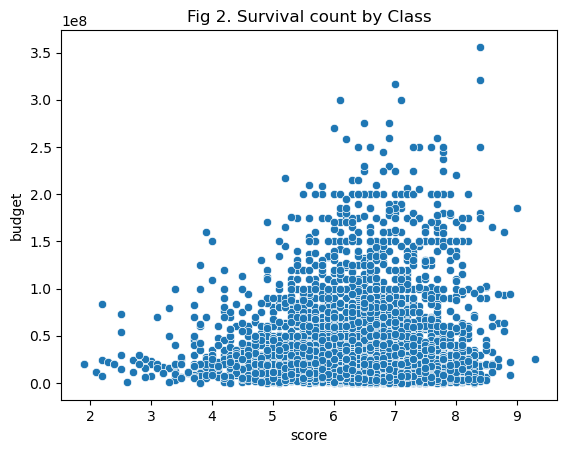

In [205]:
p = sns.scatterplot(data=movies, x="score", y='budget').set(title='Fig 2. Survival count by Class')

Let's show the relation between budget and gross earnings in a bar graph
- For this graphs purposes i'll create two new columns which divides budget and gross into high and low

In [206]:
movies["Gross Range"]=movies.gross>movies.gross.mean()
movies["Budget Range"]=movies.budget>50000000
grouped_movies = movies.groupby(['Gross Range','Budget Range']).size().unstack()
